##### Read Dataset

In [1]:
import pandas as pd 
input_data = pd.read_csv(r'..\\Inputs\\diabetes.csv')
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
data = input_data[['Pregnancies', 'Glucose', 'Insulin', 'BMI','Age','Outcome']]
data.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148,0,33.6,50,1
1,1,85,0,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,94,28.1,21,0
4,0,137,168,43.1,33,1


##### Segregating Features

In [3]:
feature_cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI','Age']
X = data[feature_cols]
y = data.Outcome 

##### Splitting dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### Applying Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

##### Finding Accuracy 

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


##### Viewing Result

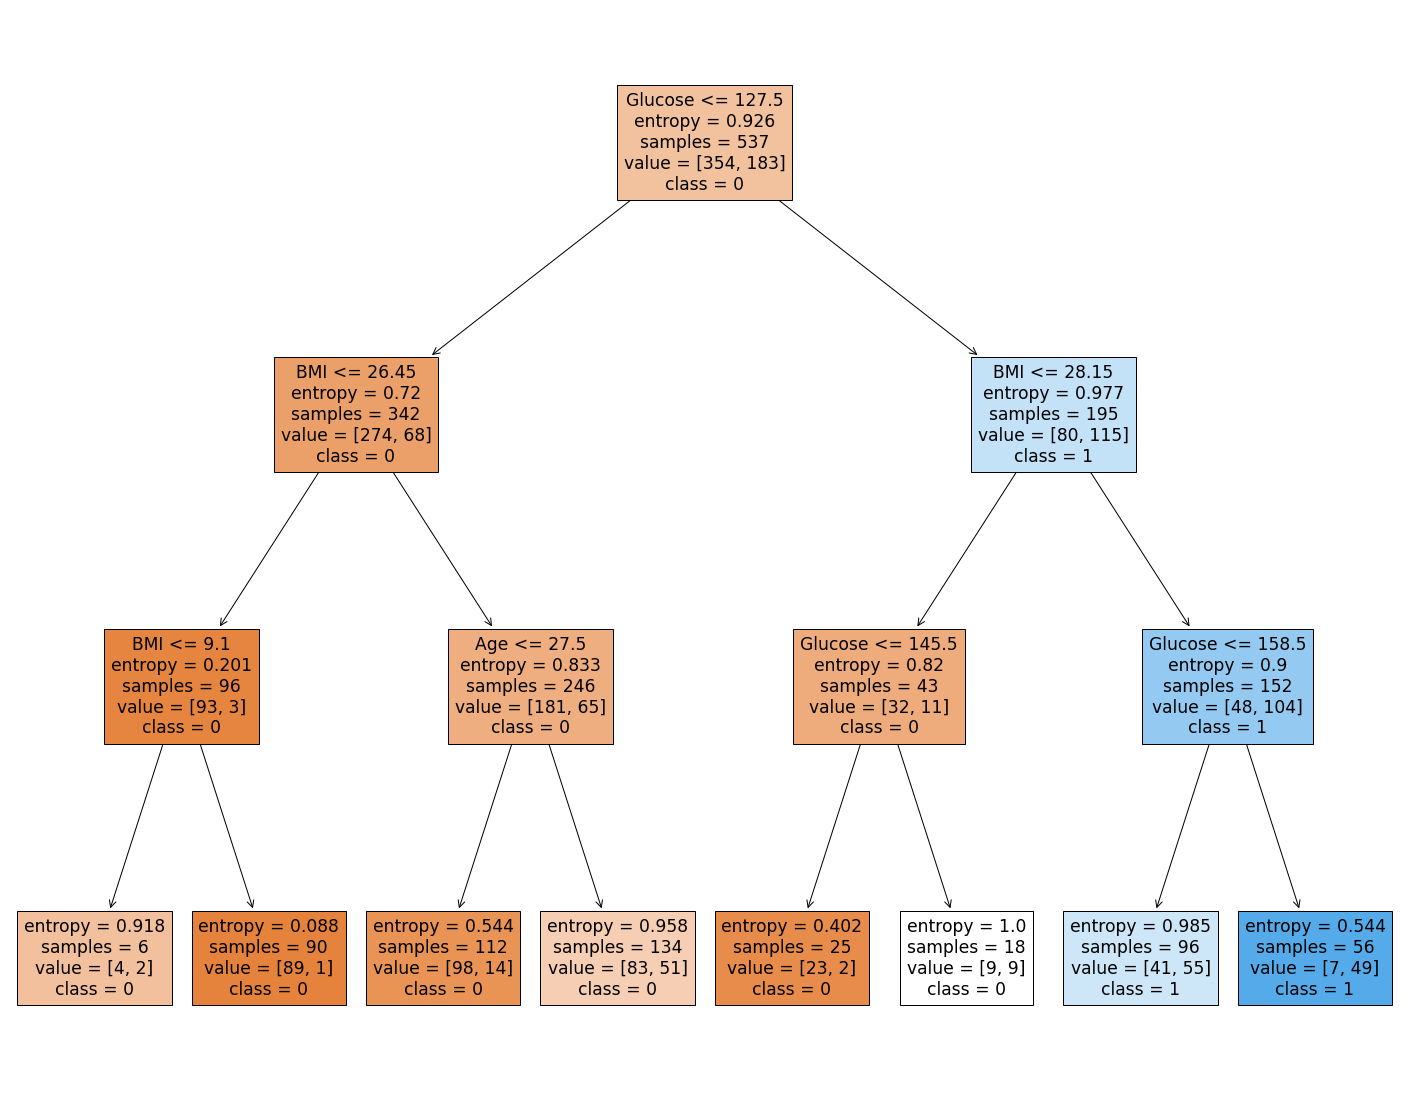

In [22]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)